In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook
import numpy as np
from sklearn import *
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LassoCV
from sklearn.inspection import permutation_importance
from xgboost import plot_importance
import seaborn as sns
import shap

c:\Users\dell\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [68]:
df1 = pd.read_csv('./data/train_feature.csv')
df1.isnull().sum()
# df1.head()

feature_0      40
feature_1      54
feature_2      45
feature_3      48
feature_4      46
               ..
feature_115    46
feature_116    34
feature_117    55
feature_118    39
feature_119    45
Length: 120, dtype: int64

In [69]:
df2 = pd.read_csv('./data/train_label.csv')
df2.isnull().sum()

label    0
dtype: int64

In [70]:
data = pd.concat([df1, df2], axis=1)
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0,0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0,0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0,0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0,2
4,49.0,-6.160454,0.709718,9.0,3.0,240.0,57.0,6.0,1.0,3.189316,...,1.068687,54.0,0.600518,4.988225,7.0,52.0,1.187483,2.0,NaN,2


In [71]:
data.dropna(axis=0, how='any',inplace=True)

In [72]:
# 去噪
data = np.array(data)
detector = EllipticEnvelope()
detector.fit(data)
outlier = detector.predict(data)
for i in range(data.shape[0]):
    if outlier[i] == -1:
        data[i, : ] = np.nan
isnan = np.isnan(data)
print(True in isnan)

True


In [73]:
data = pd.DataFrame(data)
data.isnull().sum()
data.dropna(axis=0, how='any',inplace=True)
""" sim = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data = sim.fit_transform(df1)
isnan = np.isnan(data)
print(True in isnan)
# print(data.dtype) """

" sim = SimpleImputer(missing_values = np.nan, strategy = 'mean')\ndata = sim.fit_transform(df1)\nisnan = np.isnan(data)\nprint(True in isnan)\n# print(data.dtype) "

In [74]:
labels = data.iloc[: , 120 :]
data = data.iloc[: ,0 : 120]

In [75]:
scaler = MinMaxScaler()
scaler = scaler.fit(data)
data = scaler.transform(data)
print(data.shape)

(4937, 120)


In [76]:
labels = np.array(labels)
lables = labels.astype('int')
labels.shape

(4937, 1)

In [98]:
# 特征选择 注释掉的代码为尝试过的所有方法
""" RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=15, step=20).fit(data, labels)
data = selector.transform(data) """
""" data_trans = SelectKBest(chi2, k=8).fit_transform(data, labels) """
""" sel=SelectKBest(score_func=f_classif,k=10)
sel.fit(data,labels)  
data_trans = sel.transform(data) """
""" lsvc = LinearSVC(C=0.09, penalty="l1", dual=False).fit(data, labels)
model = SelectFromModel(lsvc, prefit=True)
data = model.transform(data) """
""" clf = ExtraTreesClassifier()
clf = clf.fit(data, labels)
model = SelectFromModel(clf, prefit=True)
data = model.transform(data) """
""" data=SelectFromModel(GradientBoostingClassifier()).fit_transform(data, labels) """
""" lasso = LassoCV().fit(data, labels) 
importance = lasso.coef_
#feature_names = np.array(i for i in range(120))
plt.bar(range(len(importance)), importance)
plt.title("Feature importances via coefficients")
plt.show() """
""" model = MLPClassifier(hidden_layer_sizes=(20,),
                                activation='relu',
                                solver = 'adam',
                                alpha = 0.0001,
                                ) """
model = XGBClassifier(learning_rate = 0.1,
                            booster = 'gbtree',
                            max_depth = 20,
                            num_class = 4,
                            gamma = 2,
                            subsample = 1,
                            objective = 'muti:softprob',
                            eval_metric = 'mlogloss',
                            use_label_encoder = False,)
model.fit(data, labels)
# feature importance
# print(model.feature_importances_)
# plot
# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
""" def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()

correlation_heatmap(data[boston.feature_names[sorted_idx]]) """
""" perm_importance = permutation_importance(model, data, labels)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(sorted_idx, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()
 """






A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


' perm_importance = permutation_importance(model, data, labels)\n\nsorted_idx = perm_importance.importances_mean.argsort()\nplt.barh(sorted_idx, perm_importance.importances_mean[sorted_idx])\nplt.xlabel("Permutation Importance")\nplt.show()\n '

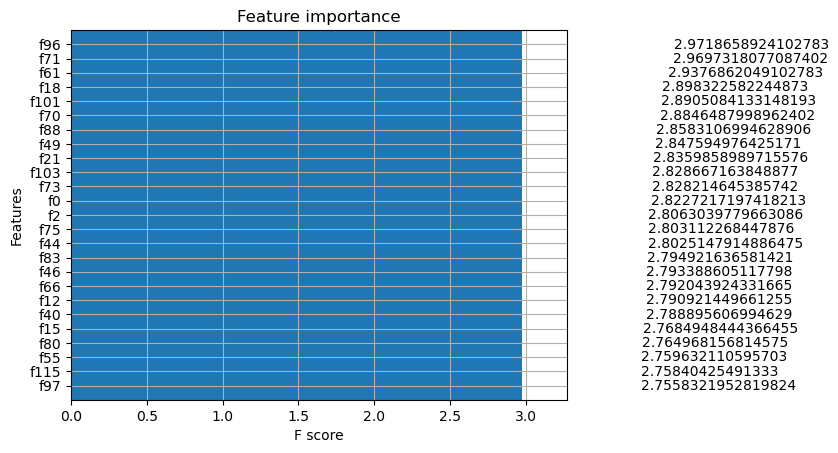

In [85]:
plot_importance(model,  height=150,xlim=None, ylim=None, 
				title='Feature importance',xlabel='F score', 
				ylabel='Features',importance_type='gain', 
				max_num_features=25,grid=True, show_values=True)

plt.show()
# print(model.feature_importances_)





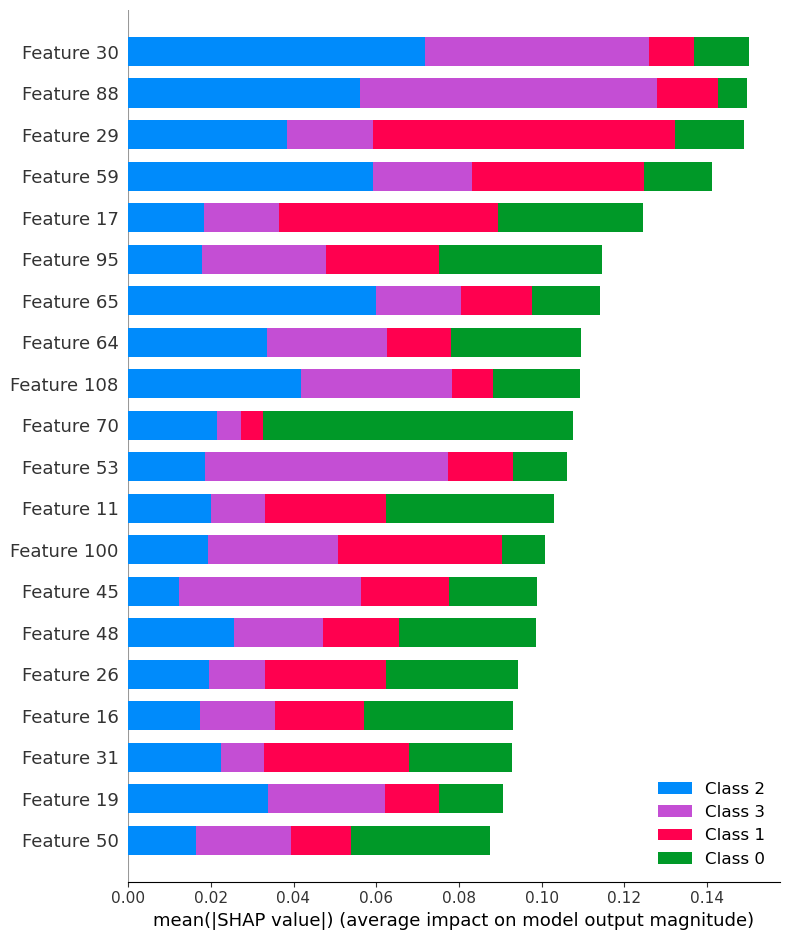

In [86]:
""" def correlation_heatmap(train):
    correlations = np.cov(train)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()
correlation_heatmap(data[index]) """
explainer = shap.TreeExplainer(model)
# explainer = shap.KernelExplainer(model.predict, data[0 : 1, :])
shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data, plot_type="bar")

In [51]:
index = [30, 29, 59, 88, 17, 53, 65]
""" for i in range(120):
    if model.feature_importances_[i] >= 0.0096:
        index.append(i) """


index

[30, 29, 59, 88, 17, 53, 65]

In [52]:
index = np.array(index)
data_trans = data[:,index]

In [20]:
# 数据降维
""" transformer = IncrementalPCA(n_components=60, batch_size= 600)
data_sparse = sparse.csr_matrix(data)
data_transformed = transformer.fit_transform(data_sparse) """

In [96]:
# 决策树
gbtree = DecisionTreeClassifier(criterion='gini', max_depth=150)
# clf = clf.fit(data_train, labels)
cross_val_score(gbtree, data_trans, labels,scoring='accuracy', cv=10)
print(cross_val_score(gbtree, data_trans, labels,scoring='accuracy', cv=10).mean())

0.24691552175805404


In [89]:
# XGBoost
xgbclassfier = XGBClassifier(learning_rate = 0.1,
                            booster = 'gbtree',
                            max_depth = 20,
                            num_class = 4,
                            gamma = 2,
                            subsample = 1,
                            objective = 'muti:softprob',
                            eval_metric = 'mlogloss',
                            use_label_encoder = False,)
print(cross_val_score(xgbclassfier, data_trans, labels,scoring='accuracy', cv=10).mean())
#[73, 90, 83, 88, 103, 17, 71, 40, 25] 0.1 20 0.1
# [30, 29, 59, 88, 17, 53, 65, 11, 95, 70, 64, 108, 26, 100, 19] 0.1 20 0.1
# 30, 29, 59, 88, 17, 53, 65 0.1 20 1
# 30, 29, 59, 88, 17, 53, 65 0.1 20 2

0.2570435489566481


In [99]:
# 神经网络
neu_net_classfier = MLPClassifier(hidden_layer_sizes=(20,),
                                max_iter = 1000,
                                activation='relu',
                                solver = 'adam',
                                alpha = 0.0001,
                                )
# cross_val_score(neu_net_classfier, data_trans, labels.ravel(),scoring='accuracy', cv=10)
print(cross_val_score(neu_net_classfier, data_trans, labels.ravel(),scoring='accuracy', cv=10).mean())

0.26230999170574276


In [111]:
# SVM_SGD
class SVM:
    def __init__(self, learning_rate,reg, num_iters, batch_size, verbose):
        self.w = None
        self.loss = None
        self.dw = None  
        self.reg = reg
        self.num_iters = num_iters
        self.batch_size = batch_size
        self.verbose = verbose   
        self.learning_rate = learning_rate 
    def svm_loss(self, x, y):
        loss = 0.0
        
        dw = np.zeros(self.w.shape)
        num_train = x.shape[0]
        scores = x.dot(self.w)
        #print(scores[range(num_train), y[0]])
        correct_class_scores = scores[ np.arange(num_train), y.reshape(-1)].reshape(num_train,1)
        margin = np.maximum(0, scores - correct_class_scores +1)
        margin[range(num_train), list(y)] = 0
        data_loss = np.sum(margin)*1.0 / num_train
        reg_loss = self.reg * np.sum(np.square(self.w))
        loss = data_loss + reg_loss
        
        x_effect = (margin > 0).astype('float')
        x_effect[range(num_train), y] -= np.sum(x_effect, axis=1)
        dw = x.T.dot(x_effect)
        dw /= num_train
        dw += 2*self.reg*self.w
        
        return loss, dw
        
    def fit(self, x, y):
        """
        Fit the coefficients via your methods
        """ 
        y = y.astype('int')
        y[:] = (y[:] - np.min(y[:])) / (np.max(y[:]) - np.min(y[:]))
        num_classes = 4
        num_train = x.shape[0]
        if self.w is None:
            self.w = 0.001 * np.random.randn(x.shape[1], num_classes)
            
        loss_history = []
        for it in range(self.num_iters):
            x_batch = None
            y_batch = None
            batch_idx = np.random.choice(num_train, size=self.batch_size, replace=False)
            x_batch = x[batch_idx]
            y_batch = y[batch_idx]
            #w_batch = self.w[batch_idx]
            #self.w = self.w
            #self.w = np.array(self.w).reshape(num_train, num_classes)
            loss, dw = self.svm_loss( x_batch, y_batch)

            loss_history.append(loss)
            self.w -= self.learning_rate * dw
            if self.verbose and it % 100 == 0:
                print('iteration %d / %d  loss :' % (it, self.num_iters))
                print(loss)
            if loss < 0.02:
                break
        return loss_history    
            
    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a neself.w
        collection of data points.
        """
        y_pred = np.zeros(X.shape)
        y_pred = np.argmax(X.dot(self.w), axis=1)
        return y_pred

In [122]:
import time
svm = SVM(learning_rate=1e-7, reg=2.5e5, num_iters=15000, batch_size=1000, verbose=True)
tic = time.time()
loss_his = svm.fit(data_trans, labels)
toc = time.time()
print('That tooks %fs' % (toc - tic))
#cross_val_score(svm, data_transformed, labels.ravel(),scoring='accuracy', cv=10)


iteration 0 / 15000  loss :
8.186299558827939
iteration 1000 / 15000  loss :
1.9999995226857221
iteration 2000 / 15000  loss :
1.9999995230050729
iteration 3000 / 15000  loss :
1.9999995219294449
iteration 4000 / 15000  loss :
1.999999524079556
iteration 5000 / 15000  loss :
1.9999995234584018
iteration 6000 / 15000  loss :
1.9999995270203863
iteration 7000 / 15000  loss :
1.9999995294229818
iteration 8000 / 15000  loss :
1.9999995265566148
iteration 9000 / 15000  loss :
1.999999527065274
iteration 10000 / 15000  loss :
1.9999995263495325
iteration 11000 / 15000  loss :
1.9999995183882262
iteration 12000 / 15000  loss :
1.9999995266897805
iteration 13000 / 15000  loss :
1.9999995246226265
iteration 14000 / 15000  loss :
1.999999517744491
That tooks 295.057891s


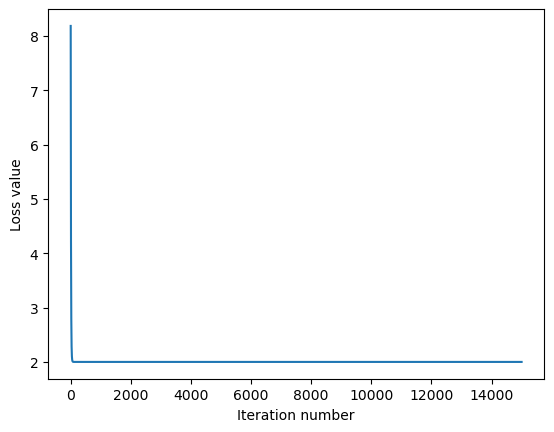

train accuracy: 0.256228


In [123]:
plt.plot(loss_his)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show() 
y_t_pre = svm.predict(data_trans)
print('train accuracy: %f' % (np.mean(labels == y_t_pre), )) 

In [118]:
# 线性多分类
def softmax(a):
    row_max = np.max(a, axis=1, keepdims=True)
    a = a - row_max
    return np.exp(a) / np.sum(np.exp(a), axis=1, keepdims=True)


def onehot_encode(Y):
    n_class = np.max(Y) + 1
    I = np.identity(n_class)
    onehot = I[Y]
    return 

class MultinomialLR:
    def __init__(self,max_iter=1000,learning_rate=0.01):
        '''Multinomial Logistic Regression
        Args:
            max_iter:
            learning_rate:
        '''
        self.w = None
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def fit(self,X,Y):
        '''
        :param X: N x D,
        :param Y: N, range in 0, 1, 2, ..., n_classes - 1
        :return:
        '''
        if len(Y.shape)==1:
            Y = onehot_encode(Y)
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        self.n_classes = Y.shape[1]
        W = np.zeros((np.size(X, 1), self.n_classes))
        for _ in range(self.max_iter):
            W_prev = np.copy(W)
            Y_hat = softmax(X @ W)
            grad = X.T @ (Y_hat - Y)
            W -= self.learning_rate * grad
            if np.allclose(W, W_prev):
                break
        self.w = W

    def predict_prob(self,X):
        '''
        Args:
            X: (N, D)
        Returns:
        '''
        if self.w is None:
            print('Please call model.fit(X,y) to train the model before predicting.')
            return
        X = np.hstack([X,np.ones((X.shape[0],1))])
        pred_y = softmax(X @ self.w)
        return pred_y

    def predict(self,X):
        return np.argmax(self.predict_prob(X),axis=1)


""" n_sample = len(data_transformed)
shuffle = np.random.permutation(n_sample)
data = data[shuffle]
labels = labels[shuffle]
split = int(n_sample * 0.8)
train_data, test_data = data[:split], data[split:]
train_labels, test_labels = labels[:split], labels[split:] """

model = MultinomialLR(max_iter=20000)
model.fit(data, labels)
test_pred = model.predict(data)
print('train accuracy: %f' % (np.mean(labels == test_pred), )) 
# print( classification_report(labels, test_pred, ))


train accuracy: 0.252300


In [77]:
# test数据集预处理
df3 = pd.read_csv('./data/test_feature.csv')
data_test = np.array(df3)
sim = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_test = sim.fit_transform(df3)
isnan = np.isnan(data_test)
print(True in isnan)
scaler = MinMaxScaler()
scaler = scaler.fit(data_test)
data_test = scaler.transform(data_test)
print(data_test.shape)
detector = EllipticEnvelope()
detector.fit(data_test)
outlier = detector.predict(data_test)
for i in range(data_test.shape[0]):
    if outlier[i] == -1:
        data_test[i, : ] = np.nan
isnan = np.isnan(data_test)
print(True in isnan)
sim = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_test = sim.fit_transform(df3)
isnan = np.isnan(data_test)
print(True in isnan)

False
(3000, 120)
True
False


In [78]:
# 生成test_label
import csv
xgbclassfier.fit(data_trans, labels)
data_test = data_test[: ,index]
labels_test = xgbclassfier.predict(data_test)
labels_test = labels_test.tolist()
test=pd.DataFrame(data=labels_test)
test.to_csv('test_label.csv', header=None, index=None) 